In [28]:
import numpy as np
from scipy.integrate import quad

def pdf(x):
    return (1 / (2 * np.pi)) * np.exp(-(x + 1)**2)

# P(X >= 2)
result, _ = quad(pdf, 2, np.inf)

print(f"Prawdopodobieństwo, że X >= 2 wynosi: {result:.4f}")

Prawdopodobieństwo, że X >= 2 wynosi: 0.0000


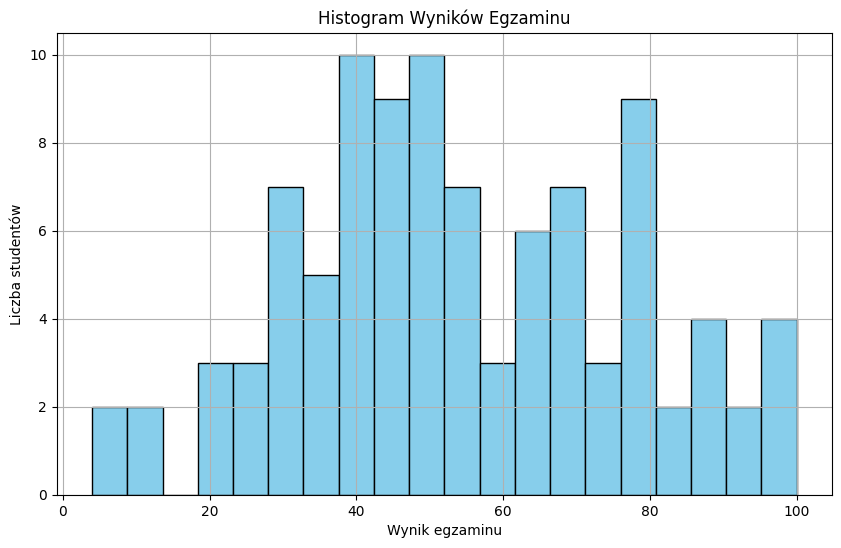

Prawdopodobieństwo zdania egzaminu (>=50 pkt): 0.5769554095788823
Prawdopodobieństwo otrzymania co najwyżej 30 punktów 0.13567460138387583
Prawdopodobieństwo otrzymania między 50 a 80 punktami: 0.4548779720682615
Prawdopodobieństwo otrzymania więcej niż 70 punktów: 0.2383131010159687
Procent studentów, którzy zaliczyli egzamin: 0.5510204081632653


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

grades = pd.read_csv('oceny.csv')

plt.figure(figsize=(10, 6))
plt.hist(grades['Wynik egzaminu'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram Wyników Egzaminu')
plt.xlabel('Wynik egzaminu')
plt.ylabel('Liczba studentów')
plt.grid(True)
plt.show()

# średnia i odchylenie standardowe
mi = np.mean(grades['Wynik egzaminu'])
sigma = np.std(grades['Wynik egzaminu'])

prob_pass = 1 - norm.cdf(50, mi, sigma)  # zdanie egzaminu
prob_below_30 = norm.cdf(30, mi, sigma)  # co najwyżej 30 pkt
prob_between_50_80 = norm.cdf(80, mi, sigma) - norm.cdf(50, mi, sigma)  # 50-80 pkt
prob_above_70 = 1 - norm.cdf(70, mi, sigma)  # więcej niż 70 pkt

print("Prawdopodobieństwo zdania egzaminu (>=50 pkt):", prob_pass)
print("Prawdopodobieństwo otrzymania co najwyżej 30 punktów", prob_below_30)
print("Prawdopodobieństwo otrzymania między 50 a 80 punktami:", prob_between_50_80)
print("Prawdopodobieństwo otrzymania więcej niż 70 punktów:", prob_above_70)

# zdawalność
pass_rate = np.mean(grades['Wynik egzaminu'] >= 50)
print("Procent studentów, którzy zaliczyli egzamin:", pass_rate)

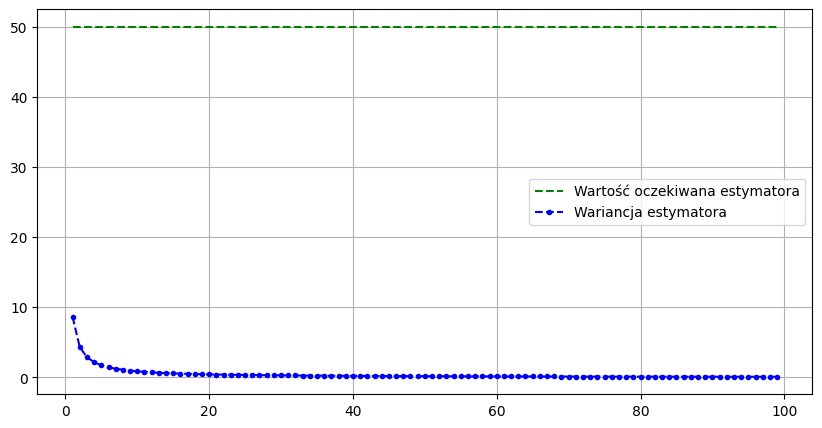

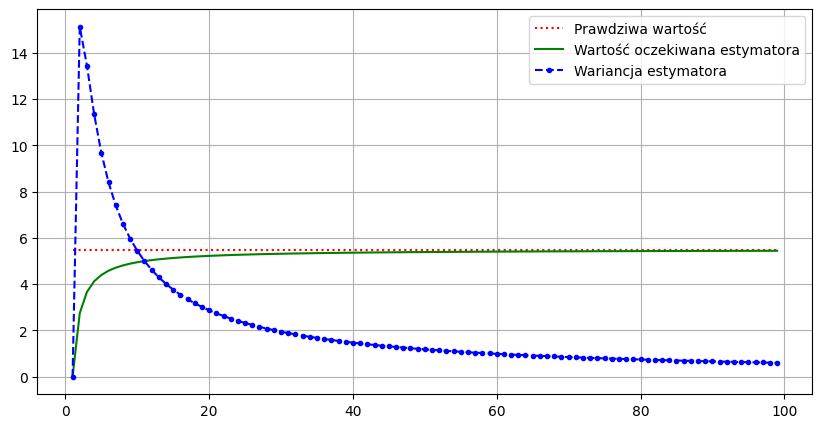

In [42]:
import numpy as np
import matplotlib.pyplot as plt

mu = 50
sigma_2 = 5.5

n = np.arange(1, 100)

e_est = mu * np.ones(len(n))
var_est = np.pi * sigma_2 / (2 * n)

plt.figure(figsize=(10, 5))
plt.plot(n, e_est, 'g--', label='Wartość oczekiwana estymatora')
plt.plot(n, var_est, 'b.--', label='Wariancja estymatora')
plt.legend()
plt.grid(True)
plt.show()

e_est = ((n-1) / n) * sigma_2
var_est = 2 * ((n-1) / n**2) * sigma_2**2

plt.figure(figsize=(10, 5))
plt.plot(n, sigma_2 * np.ones(len(n)), "r:", label="Prawdziwa wartość")
plt.plot(n, e_est, "g-", label="Wartość oczekiwana estymatora")
plt.plot(n, var_est, 'b.--', label='Wariancja estymatora')
plt.legend()
plt.grid(True)
plt.show()

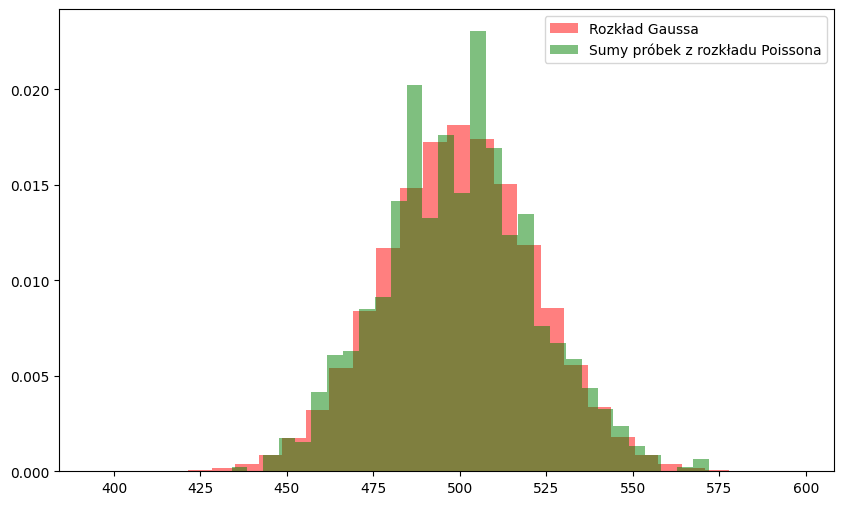

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

num_samples = 1000
sample_size = 100

sums = [np.sum(np.random.poisson(5, sample_size)) for _ in range(num_samples)]

mu_4 = np.mean(sums)
sigma_4 = np.std(sums)

normal_dist = np.random.normal(mu_4, sigma_4, 1000000)

plt.figure(figsize=(10, 6))
plt.hist(normal_dist, bins=30, density=True, alpha=0.5, color="red", label="Rozkład Gaussa")
plt.hist(sums, bins=30, density=True, alpha=0.5, color='green', label='Sumy próbek z rozkładu Poissona')
plt.legend()
plt.show()